In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

Dataset containg data of the most important european leagues: La Liga, EPL, BundesLiga, Serie A, Ligue 1, RFPL

By analysing the data we will try to anwser a few questions: 

With this dataset we can have more arguments in describing every league and can find answers to questions like:

Which teams create more chances to score a goal?

Which teams use pressure a lot and what results does this give?

Which teams play more defensive/offensive football?

Which teams have luck on their side, which do not?

Is there any particular characteristic of each league?

With this high overview dataset we can play a lot and understand more European football.

Data Dictionary:

    xG - expected goals metric, it is a statistical measure of the quality of chances created and conceded. More at understat.com

    xG_diff - difference between actual goals scored and expected goals.

    npxG - expected goals without penalties and own goals.

    xGA - expected goals against.

    xGA_diff - difference between actual goals missed and expected goals against.

    npxGA - expected goals against without penalties and own goals.

    npxGD - difference between "for" and "against" expected goals without penalties and own goals.

    ppda_coef - passes allowed per defensive action in the opposition half (power of pressure)

    oppda_coef - opponent passes allowed per defensive action in the opposition half (power of opponent's pressure)

    deep - passes completed within an estimated 20 yards of goal (crosses excluded)

    deep_allowed - opponent passes completed within an estimated 20 yards of goal (crosses excluded)

    xpts - expected points

    xpts_diff - difference between actual and expected points


In [2]:
football = pd.read_csv('understat.com.csv', header =0)
#The first rows of the data frame
football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 24 columns):
Unnamed: 0      570 non-null object
Unnamed: 1      570 non-null int64
position        570 non-null int64
team            570 non-null object
matches         570 non-null int64
wins            570 non-null int64
draws           570 non-null int64
loses           570 non-null int64
scored          570 non-null int64
missed          570 non-null int64
pts             570 non-null int64
xG              570 non-null float64
xG_diff         570 non-null float64
npxG            570 non-null float64
xGA             570 non-null float64
xGA_diff        570 non-null float64
npxGA           570 non-null float64
npxGD           570 non-null float64
ppda_coef       570 non-null float64
oppda_coef      570 non-null float64
deep            570 non-null int64
deep_allowed    570 non-null int64
xpts            570 non-null float64
xpts_diff       570 non-null float64
dtypes: float64(11), int64(11),

In [3]:
football = football.rename(columns={"Unnamed: 0": "league",})
football = football.rename(columns={"Unnamed: 1": "year",})

In [4]:
football.tail()

,league,year,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
565,Serie_A,2018,16,Parma Calcio 1913,38,10,11,17,41,61,...,64.981144,3.981144,58.890790,-21.598605,16.819575,7.936238,128,346,36.7845,-4.2155
566,Serie_A,2018,17,Genoa,38,8,14,16,39,57,...,56.354305,-0.645695,51.786555,-11.053906,12.171971,9.158080,235,255,44.6818,6.6818
567,Serie_A,2018,18,Empoli,38,10,8,20,51,70,...,63.327380,-6.672620,57.237067,-10.640657,14.096074,11.303252,292,265,46.5398,8.5398
568,Serie_A,2018,19,Frosinone,38,5,10,23,29,69,...,64.593669,-4.406331,60.787299,-28.490508,14.777899,9.125747,139,335,35.9425,10.9425
569,Serie_A,2018,20,Chievo,38,2,14,22,25,75,...,62.692868,-12.307132,59.480417,-27.571891,13.518123,11.513254,147,296,35.0001,15.0001


In [5]:
football.describe()

,year,position,matches,wins,draws,loses,scored,missed,pts,xG,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,...,570.000000,570.000000,570.000000,5.700000e+02,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,2016.000000,10.061404,36.245614,13.531579,9.182456,13.531579,48.385965,48.385965,49.777193,46.957947,...,46.957947,-1.428018,42.881170,1.495879e-16,10.735848,10.735848,209.524561,209.524561,49.939568,0.162375
std,1.415456,5.580982,2.906152,5.935200,2.927064,5.540700,17.634599,13.844167,17.051184,14.464017,...,11.625214,6.672813,10.826301,1.935850e+01,2.480779,3.284070,84.037695,52.899483,13.540545,7.218713
min,2014.000000,1.000000,30.000000,2.000000,2.000000,1.000000,13.000000,15.000000,13.000000,15.064491,...,16.838674,-29.175087,16.084399,-4.220877e+01,5.683535,4.394458,76.000000,83.000000,17.907700,-24.531500
25%,2015.000000,5.000000,34.000000,9.000000,7.000000,10.000000,36.000000,39.000000,38.000000,37.294168,...,39.361073,-6.100234,35.789070,-1.320242e+01,9.008791,8.653570,153.000000,171.000000,40.426425,-4.480550
50%,2016.000000,10.000000,38.000000,12.000000,9.000000,14.000000,45.000000,49.000000,46.500000,44.600600,...,47.336579,-1.202018,43.117482,-3.202510e+00,10.408070,10.192134,187.000000,206.000000,47.411750,0.218650
75%,2017.000000,15.000000,38.000000,17.000000,11.000000,17.000000,56.000000,57.000000,60.000000,53.788473,...,54.619647,3.200394,50.214848,9.843395e+00,12.211141,11.971695,243.000000,246.000000,57.330075,4.802800
max,2018.000000,20.000000,38.000000,32.000000,18.000000,29.000000,118.000000,94.000000,100.000000,113.598270,...,78.863255,15.540152,72.013818,7.304931e+01,20.304275,30.468113,582.000000,364.000000,94.380000,23.047500


In [6]:
football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 24 columns):
league          570 non-null object
year            570 non-null int64
position        570 non-null int64
team            570 non-null object
matches         570 non-null int64
wins            570 non-null int64
draws           570 non-null int64
loses           570 non-null int64
scored          570 non-null int64
missed          570 non-null int64
pts             570 non-null int64
xG              570 non-null float64
xG_diff         570 non-null float64
npxG            570 non-null float64
xGA             570 non-null float64
xGA_diff        570 non-null float64
npxGA           570 non-null float64
npxGD           570 non-null float64
ppda_coef       570 non-null float64
oppda_coef      570 non-null float64
deep            570 non-null int64
deep_allowed    570 non-null int64
xpts            570 non-null float64
xpts_diff       570 non-null float64
dtypes: float64(11), int64(11),

In [7]:
#Counts the NAs
football.isna().sum()

league          0
year            0
position        0
team            0
matches         0
wins            0
draws           0
loses           0
scored          0
missed          0
pts             0
xG              0
xG_diff         0
npxG            0
xGA             0
xGA_diff        0
npxGA           0
npxGD           0
ppda_coef       0
oppda_coef      0
deep            0
deep_allowed    0
xpts            0
xpts_diff       0
dtype: int64

In [8]:
EPL= football[(football.league == 'EPL')]

In [9]:
#Subsetting into the 5 diferent leagues
BUN= football[(football.league == 'Bundesliga')]
LAL= football[(football.league == 'La_liga')] 
LI1= football[(football.league == 'Ligue_1')] 
RPL= football[(football.league == 'RFPL')]

In [10]:
#lets calculate the number of goals per game of each league. This way we can have an idea of which can be the most entertaining in tearms of goals socored. 
EPL_goals_match = EPL.loc[:,"scored"]/EPL.loc[:,"matches"]
#Calculate its mean
EPL_goals_match_avg = EPL_goals_match.mean()

In [11]:
#Lets repeat the process for the other leagues
#Bundesliga
BUN_goals_match = BUN.loc[:,"scored"]/BUN.loc[:,"matches"]
#Calculate its mean
BUN_goals_match_avg=BUN_goals_match.mean()


In [12]:
#LaLiga
LAL_goals_match = LAL.loc[:,"scored"]/LAL.loc[:,"matches"]
#Calculate its mean
LAL_goals_match_avg=LAL_goals_match.mean()

In [13]:
#Ligue1
LI1_goals_match = LI1.loc[:,"scored"]/LI1.loc[:,"matches"]
#Calculate its mean
LI1_goals_match_avg=LI1_goals_match.mean()

In [14]:
#Russian Premier League
RPL_goals_match = RPL.loc[:,"scored"]/RPL.loc[:,"matches"]
#Calculate its mean
RPL_goals_match_avg=RPL_goals_match.mean()

In [15]:
#Lets combining that information into one dataframe
Leagues_goal_avg= pd.DataFrame([EPL_goals_match_avg,BUN_goals_match_avg,LAL_goals_match_avg,LI1_goals_match_avg,RPL_goals_match_avg])
league = ['EPL', 'BUN','LAL','LI1','RPL']
Leagues_goal_avg['league']= league

In [16]:
#Change names and order of the columns
Leagues_goal_avg.columns = ['average', 'league']
Leagues_goal_avg = Leagues_goal_avg[['league', 'average']]

In [17]:
Leagues_goal_avg

,league,average
0,EPL,1.356579
1,BUN,1.442484
2,LAL,1.362368
3,LI1,1.291053
4,RPL,1.152500


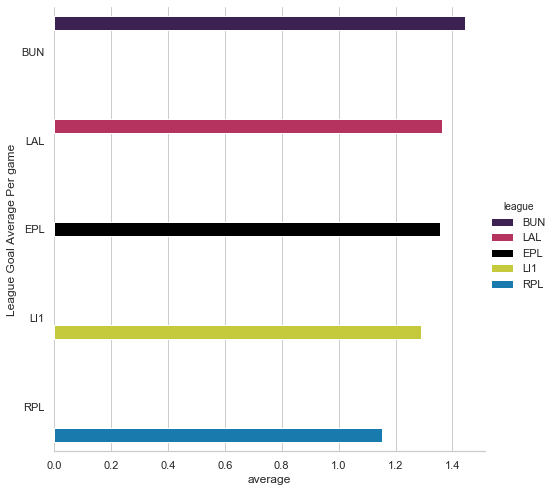

In [18]:
#Sorting out the data ascending
Leagues_goal_avg = Leagues_goal_avg.sort_values('average', ascending = False)
sns.set(style="whitegrid")
league_colors = ["#3D195B", "#ca1f58", "#000000", "#dbe126","#0081c6"]
sns.set_palette(sns.color_palette(league_colors ))
# Draw a nested barplot to show survival for class and sex
leagues_plot = sns.catplot(x="average", y="league", hue="league", data=Leagues_goal_avg,
                height=7, kind="bar")
leagues_plot.despine(left=True)
leagues_plot.set_ylabels("League Goal Average Per game")

As we can see on the graph above BUN is the ones with more goals per game followed by EPL and LAL. If you want to see goals, BUN is your league.

But is not only about goals that the league is made of, the chances are also important and entertaining for the spectator. Lets analyse the xG which is a statistical measure of the quality of chances created and conceded, and gives us an idea of which league has more chances around the goal.

In [19]:
#Subsetting xG per league and calculating mean
EPL_xG_mean= EPL['xG'].mean()
BUN_xG_mean= BUN['xG'].mean()
LAL_xG_mean= LAL['xG'].mean()
LI1_xG_mean= LI1['xG'].mean()
RPL_xG_mean= RPL['xG'].mean()


In [20]:
#Lets add this new values to our previously created table
xG_league = [EPL_xG_mean,BUN_xG_mean,LAL_xG_mean,LI1_xG_mean,RPL_xG_mean]
xG_league = pd.Series(xG_league)
Leagues_goal_xG = pd.DataFrame(Leagues_goal_avg)
Leagues_goal_xG.loc[:,2] = xG_league 
Leagues_goal_xG.columns = ['league', 'average', 'xG']
Leagues_goal_xG = Leagues_goal_xG[['league', 'average', 'xG']]

In [21]:
Leagues_goal_xG

,league,average,xG
1,BUN,1.442484,47.802673
2,LAL,1.362368,50.980721
0,EPL,1.356579,50.082649
3,LI1,1.291053,47.280538
4,RPL,1.152500,32.821028


In [22]:
#Now, instead of creating a stack plot bar, lets sum the values of xG with average goals
Leagues_goal_xG['sum'] = Leagues_goal_xG.average + Leagues_goal_xG.xG
Leagues_goal_xG

,league,average,xG,sum
1,BUN,1.442484,47.802673,49.245156
2,LAL,1.362368,50.980721,52.343090
0,EPL,1.356579,50.082649,51.439228
3,LI1,1.291053,47.280538,48.571591
4,RPL,1.152500,32.821028,33.973528


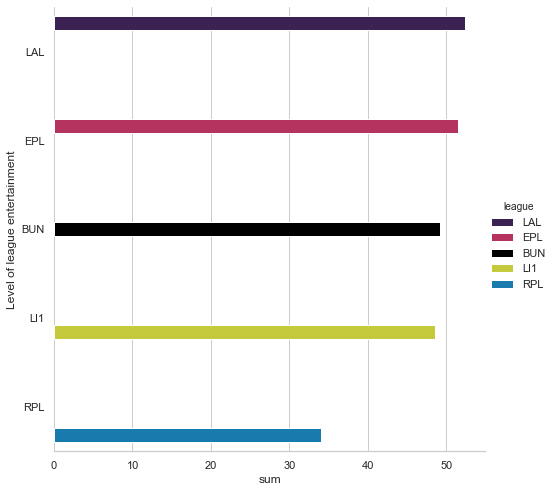

In [23]:
#Now that we have our table we can create a graph with the xG and the average goals per game
#Sorting out the data ascending
Leagues_goal_xG = Leagues_goal_xG.sort_values('sum', ascending = False)
import seaborn as sns
sns.set(style="whitegrid")
league_colors = ["#3D195B", "#ca1f58", "#000000", "#dbe126","#0081c6"]
sns.set_palette(sns.color_palette(league_colors ))
# Draw a nested barplot to show survival for class and sex

g = sns.catplot(x="sum", y="league", hue="league", data=Leagues_goal_xG,
                 height=7, kind="bar")
g.despine(left=True)
g.set_ylabels("Level of league entertainment")

As we can see from the graph above, LAL is the most entertaining league since on the overall metrics of goals per game and chances created, it's the most interesting league. 

In [24]:
#Let's now analyse the best teams of each league, in other words, the reams that crete more chances. Starting by the EPL.
EPL_team_xG_mean = EPL.groupby('team')['xG'].mean() 
EPL_team_xG_mean.sort_values(ascending=False)

team
Manchester City            81.403789
Arsenal                    68.795897
Liverpool                  65.927621
Tottenham                  63.305835
Chelsea                    61.609724
Manchester United          56.972668
Wolverhampton Wanderers    53.058692
Leicester                  52.673227
Southampton                50.540573
Everton                    49.215071
Crystal Palace             48.011779
Bournemouth                46.881683
West Ham                   46.819043
Queens Park Rangers        45.726091
Watford                    44.258792
Stoke                      43.378863
Fulham                     42.621864
Cardiff                    41.769727
Newcastle United           40.590826
Norwich                    39.187494
Burnley                    38.119328
West Bromwich Albion       37.944655
Swansea                    37.518126
Sunderland                 37.395668
Brighton                   37.121142
Hull                       33.315263
Middlesbrough              30.930

In [25]:
EPL_team_xG_mean =EPL_team_xG_mean.to_frame()
EPL_team_xG_mean.reset_index(level=0, inplace=True)
EPL_team_xG_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
team    29 non-null object
xG      29 non-null float64
dtypes: float64(1), object(1)
memory usage: 592.0+ bytes


In [26]:
#Sorting out the data ascending and selecting the top 10
bestteamsEPL = EPL_team_xG_mean.sort_values('xG', ascending = False)
bestteamsEPL = bestteamsEPL.head(5)

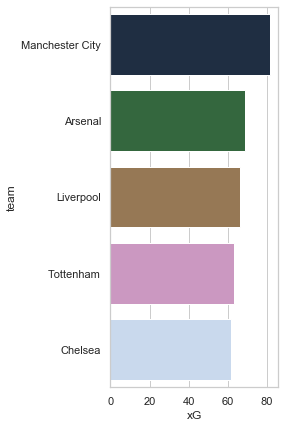

In [27]:
#Creating a plotbar eith Xg 
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(3, 7))
sns.barplot(x="xG", y="team", data=bestteamsEPL,
            label="Total", palette = 'cubehelix')

As we can see, on the EPL, Man. City is the team with more quality of chances to score goals. But lets have an overview on the global results of each league. 
Let's find out which league as the hightest ratio of goals per match. 

In [28]:
#The same procedure for La Liga

In [29]:
LAL_team_xG_mean = LAL.groupby('team')['xG'].mean() 
LAL_team_xG_mean.sort_values(ascending=False)
LAL_team_xG_mean =LAL_team_xG_mean.to_frame()
LAL_team_xG_mean.reset_index(level=0, inplace=True)
#Sorting out the data ascending and selecting the top 10
bestteamsLAL = LAL_team_xG_mean.sort_values('xG', ascending = False)
bestteamsLAL = bestteamsLAL.head(5)

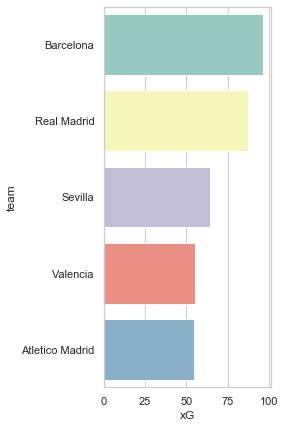

In [30]:
#Creating a plotbar eith Xg 
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(3, 7))
sns.barplot(x="xG", y="team", data=bestteamsLAL,
            label="Total", palette = 'Set3' )

The results are clear, in La Liga the two dominant teams are Barcelona and Real Madrid which have a clear advantage on the number of chances cretead compared with the other teams. This shows that there is a very diferent dimension from the top 2 teams.

In [31]:
BUN_team_xG_mean = BUN.groupby('team')['xG'].mean() 
BUN_team_xG_mean.sort_values(ascending=False)
BUN_team_xG_mean =BUN_team_xG_mean.to_frame()
BUN_team_xG_mean.reset_index(level=0, inplace=True)
#Sorting out the data ascending and selecting the top 10
bestteamsBUN = BUN_team_xG_mean.sort_values('xG', ascending = False)
bestteamsBUN = bestteamsBUN.head(5)

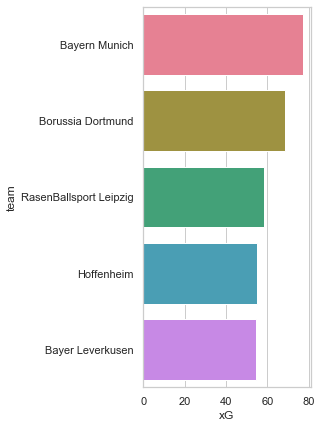

In [32]:
#Creating a plotbar eith Xg 
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(3, 7))
sns.barplot(x="xG", y="team", data=bestteamsBUN,
          palette = 'husl' )

On the bundesliga there's no margin for doubt, Bayern Munich has been rulling the league, between 2014 and 2018, followed be Borussia Dortmund

In [33]:
LI1_team_xG_mean = LI1.groupby('team')['xG'].mean() 
LI1_team_xG_mean.sort_values(ascending=False)
LI1_team_xG_mean =LI1_team_xG_mean.to_frame()
LI1_team_xG_mean.reset_index(level=0, inplace=True)
#Sorting out the data ascending and selecting the top 10
bestteamsLI1 = LI1_team_xG_mean.sort_values('xG', ascending = False)
bestteamsLI1 = bestteamsLI1.head(5)

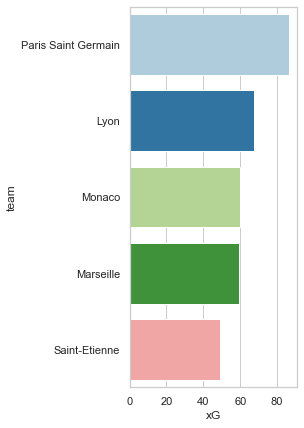

In [34]:
#Creating a plotbar eith Xg 
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(3, 7))
sns.barplot(x="xG", y="team", data=bestteamsLI1,
          palette = 'Paired' )

In France, there isn't much doubt on who's the king of the league. PSG is the dominant force of the league.

In [35]:
RPL_team_xG_mean = RPL.groupby('team')['xG'].mean() 
RPL_team_xG_mean.sort_values(ascending=False)
RPL_team_xG_mean =RPL_team_xG_mean.to_frame()
RPL_team_xG_mean.reset_index(level=0, inplace=True)
#Sorting out the data ascending and selecting the top 10
bestteamsRPL = RPL_team_xG_mean.sort_values('xG', ascending = False)
bestteamsRPL = bestteamsRPL.head(5)

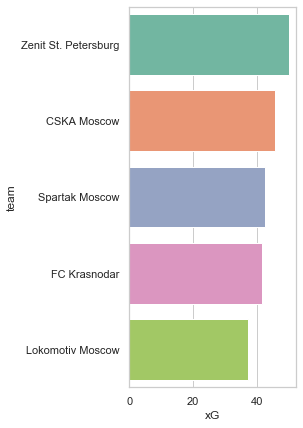

In [36]:
#Creating a plotbar eith Xg 
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(3, 7))
sns.barplot(x="xG", y="team", data=bestteamsRPL,
          palette = 'Set2' )

In Russia there it shows a good competitivity amogst the top 5 teams as they are very close to each other

But let's see now which team has been the dominant force in Europe.

In [37]:
best_teams_Europe= football[['team','xG']]
best_teams_Europe = best_teams_Europe.sort_values('xG', ascending = False)
best_teams_Europe = best_teams_Europe.drop_duplicates(subset='team', keep='first')
best_teams_Europe=best_teams_Europe.head(10)
best_teams_Europe

,team,xG
210,Barcelona,113.598270
191,Real Madrid,95.766243
370,Paris Saint Germain,95.344060
170,Manchester City,93.720559
72,Bayern Munich,92.240857
19,Borussia Dortmund,83.410238
511,Roma,82.996525
353,Marseille,82.197779
80,Hoffenheim,79.954644
171,Liverpool,79.457540


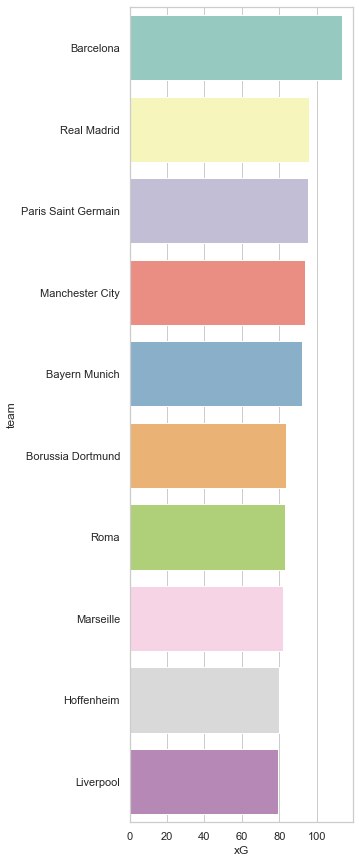

In [38]:
#Creating a plotbar eith Xg 
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(4, 15))
sns.barplot(x="xG", y="team", data=best_teams_Europe,
          palette = 'Set3' )

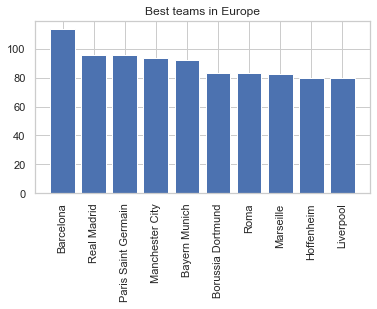

In [39]:
plt.bar(best_teams_Europe.team, best_teams_Europe.xG)
names = (best_teams_Europe.team)
plt.xticks(names, rotation=90)
plt.subplots_adjust(bottom=0.1)
plt.title("Best teams in Europe")
plt.subplots_adjust(top=0.7)

Now that we have a better understanding of which are the best leagues and the best teams in Europe, lets try to understand the correlation between the variables and which ones have more impact on the classification of the teams. After that we will try to predict who will be the winner of the each league. 

In [40]:
corrMatrix = football.corr()
print (corrMatrix)

                      year      position       matches      wins     draws  \
year          1.000000e+00 -1.422701e-17 -1.214293e-17  0.002510 -0.010181   
position     -1.422701e-17  1.000000e+00  1.301810e-01 -0.870112  0.187476   
matches      -1.214293e-17  1.301810e-01  1.000000e+00  0.202108  0.173228   
wins          2.510368e-03 -8.701120e-01  2.021080e-01  1.000000 -0.334472   
draws        -1.018053e-02  1.874761e-01  1.732278e-01 -0.334472  1.000000   
loses         2.689107e-03  9.013048e-01  2.164982e-01 -0.788496 -0.079138   
scored        2.717773e-02 -7.069905e-01  2.949861e-01  0.882977 -0.224380   
missed        3.461879e-02  7.672884e-01  3.757511e-01 -0.615375  0.031134   
pts           8.738123e-04 -8.764265e-01  2.407870e-01  0.986827 -0.177607   
xG            7.903514e-02 -6.338118e-01  3.655672e-01  0.818197 -0.171363   
xG_diff       9.599821e-02  4.771775e-01  1.237880e-02 -0.540294  0.213754   
npxG          7.004033e-02 -6.321608e-01  3.603043e-01  0.816677

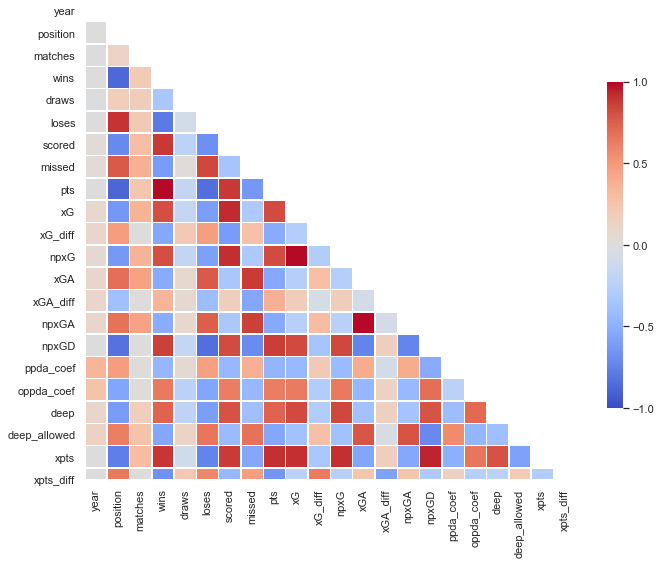

In [41]:
#Let's create a plot where we can see what are the highly correlated features
f, ax = plt.subplots(figsize=(11, 15))
mask = np.zeros_like(corrMatrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

heatmap = sns.heatmap(corrMatrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot_kws = {'size': 12})

#add the column names as labels
ax.set_yticklabels(corrMatrix.columns, rotation = 0)
ax.set_xticklabels(corrMatrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [42]:
# Select upper triangle of correlation matrix
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print(to_drop)

['loses', 'scored', 'pts', 'xG', 'npxG', 'xGA', 'npxGA', 'npxGD', 'xpts']


In [100]:
#Besides the hihgly correlated features, we've also took out the numeric variables like "League" and "Team" or the variables that are somehow neutral like "matches' or "draws" and won't help the model
football_train = football.drop(['loses', 'scored', 'deep','deep_allowed','xpts_diff','xG', 'npxG', 'xGA', 'npxGA', 'npxGD', 'xpts', 'year', 'team', 'matches', 'draws', 'league'], axis=1)
football_train

,position,wins,missed,pts,xG_diff,xGA_diff,ppda_coef,oppda_coef
0,1,25,18,79,-13.794255,3.938729,5.761476,25.022717
1,2,20,38,69,-13.652269,0.822021,9.136319,10.289876
2,3,19,26,66,-1.258428,10.343299,12.751108,12.783803
3,4,17,37,61,-12.844301,-2.279614,5.693289,7.347595
4,5,15,43,49,0.911698,3.659608,7.625900,10.402360
...,...,...,...,...,...,...,...,...
565,16,10,61,41,0.098643,3.981144,16.819575,7.936238
566,17,8,57,38,5.539068,-0.645695,12.171971,9.158080
567,18,10,70,38,1.061419,-6.672620,14.096074,11.303252
568,19,5,69,25,7.103252,-4.406331,14.777899,9.125747


So now that we have explored and cleaned the data lets train a few models with the intent of predicting the position on the teams by the end of the season 2019/2020

<h3> Model testing and trainning </h3>

In [101]:
from sklearn.model_selection import train_test_split

#Selecting the independent variables
features= football_train.iloc[:,1:23]

#Selecting dependent variable
depVar = football_train['position']

#Establish train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, depVar, test_size=0.25)

#Use the shape function to double check that the split was made as needed:
X_train.shape, X_test.shape


((427, 7), (143, 7))

In [102]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
#training the algorithm
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
#Lets analyse its accuracy
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
predictions = cross_val_predict(regressor, X_test, y_test, cv = 3)
regressor.score(X_train, y_train)

0.8494773950187406

In [104]:
#Cross Validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, X_train, y_train, cv=3)
print(scores)

[0.84065557 0.82049677 0.85900237]


In [105]:
#Mean score and confidence interval
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.84 (+/- 0.03)


In [106]:
#Print Predictions
predictions

array([10.42373246, 16.59912571, 17.05202024,  3.28050591, 12.6222059 ,
        2.19152442,  7.08092117, 16.96323336, 13.60680041,  7.84575968,
        8.61490675, 14.14587186, -7.1167383 ,  3.14640408,  9.76445909,
       14.00809955,  7.20085575, 12.0305338 , 22.16836023, 13.74569352,
        7.93910586, 13.59664992, 19.09236084, 11.59448971, 10.25257113,
       15.15182155, 12.53713451,  4.48511227, 16.21217974, 13.13494159,
       13.42960202, 14.06556223, 15.41364519, 11.66612006, 10.40638002,
       12.84417822, 20.13534922, 14.87548415, 13.59651056,  4.95732829,
       18.8294911 , 13.96842034, 15.14730901, 12.89728216,  3.27115676,
       -4.92552224, 15.75255228, 14.36540083,  4.91118348, 12.76218539,
       13.39517802,  2.56273517,  8.30166368, 13.59321754,  9.03232481,
       11.53298632, 15.98615933, 18.19953528, 12.62139419,  1.03562477,
       12.83832878, 13.08404756,  8.2753461 , 13.34952901,  3.6045576 ,
       10.1491984 ,  2.74839273, 10.401272  ,  1.11173239, 10.85

In [107]:
#Although the accuracy of our predictions is not bad, we have some negative results so let's try a different model

In [108]:
from sklearn import svm
svm = svm.SVR(gamma = 'auto')
svm.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [109]:
predictions_svm = cross_val_predict(svm, X_test, y_test, cv = 3)
svm.score(X_train, y_train)

0.287099816743031

In [110]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
predictions_ridge = cross_val_predict(ridge, X_test, y_test, cv = 3)
ridge.score(X_train, y_train)

0.8494773817614212

In [111]:
predictions_ridge

array([10.42537688, 16.58275394, 17.04517771,  3.27898073, 12.60610948,
        2.19278797,  7.0922828 , 16.97547757, 13.61384773,  7.82599798,
        8.61937972, 14.13992551, -7.10754656,  3.15090881,  9.76078485,
       14.01584214,  7.20989572, 12.04326217, 22.1574456 , 13.74872166,
        7.92165993, 13.59189096, 19.0816363 , 11.59142685, 10.23693721,
       15.14815556, 12.52831145,  4.49824871, 16.22975603, 13.14904495,
       13.42275475, 14.06497786, 15.40619087, 11.67014093, 10.39831239,
       12.84500834, 20.14543658, 14.8814747 , 13.59458016,  4.94855665,
       18.82762175, 13.97160733, 15.14305456, 12.88967004,  3.26283092,
       -4.90701614, 15.75008443, 14.36044578,  4.91465943, 12.75594633,
       13.39746415,  2.56525488,  8.30289244, 13.59265135,  9.03298195,
       11.53663742, 15.98954678, 18.1984042 , 12.62044146,  1.03597164,
       12.83915963, 13.08560293,  8.27269992, 13.34950808,  3.60318133,
       10.1517784 ,  2.75485081, 10.40583005,  1.11145089, 10.85

In [112]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
predictions_lasso = cross_val_predict(lasso, X_test, y_test, cv = 3)
lasso.score(X_train, y_train)

0.8491744785029058

In [113]:
predictions_lasso

array([10.3536246 , 16.32194733, 16.97891373,  3.19754511, 12.26272549,
        2.19814871,  7.16871187, 17.16705802, 13.69717047,  7.48075618,
        8.62443797, 14.00398135, -7.11623064,  3.21193617,  9.71273983,
       14.15995003,  7.30340981, 12.21674602, 22.11306769, 13.82400473,
        7.67813258, 13.5719111 , 18.95676122, 11.54674767, 10.0214409 ,
       15.18030331, 12.4008835 ,  4.70585703, 16.28748831, 13.33008667,
       13.34376615, 14.03133531, 15.35646404, 11.71068607, 10.2968507 ,
       12.83542656, 20.12928786, 14.88055087, 13.66049588,  4.86121759,
       18.78640796, 14.03204476, 14.96989213, 12.75194022,  3.17744051,
       -4.70739397, 15.71450226, 14.31190503,  5.01434099, 12.62905733,
       13.3683414 ,  2.69654334,  8.35053766, 13.59354427,  9.06090027,
       11.70010768, 16.00188695, 18.11614603, 12.63098612,  1.09300598,
       12.89645287, 13.15264262,  8.19899397, 13.39722722,  3.58481958,
       10.20126334,  3.0026138 , 10.58809834,  1.1810113 , 10.96

In [114]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(X_train, y_train)
predictions_rf = cross_val_predict(rf, X_test, y_test, cv = 3)
rf.score(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9821124014308681

In [115]:
scores_rf = cross_val_score(rf, X_train, y_train, cv=3)
print(scores_rf)

[0.88374956 0.89998351 0.91062402]


In [116]:
#Mean score and confidence interval
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_rf.mean(), scores.std() * 2))

Accuracy: 0.90 (+/- 0.03)


In [117]:
predictions_rf

array([11.6, 16.1, 17.3,  2. , 10.9,  1.8,  6.9, 18.6, 17. ,  6.1,  7.1,
       14.2,  1.1,  3.3, 13.3, 16.5,  9. , 11.6, 18.8, 14.5,  6.2, 15.9,
       19. , 11.6,  8.1, 15. , 12.5,  4.8, 17.2, 12.5, 15.1, 14.4, 15.9,
       14.4,  9.2, 11.6, 19.3, 14.2, 14.5,  5.4, 18.8, 16.8, 14.7, 12.8,
        4.2,  2.3, 17.4, 13.7,  5.1, 11.3, 15.2,  5. ,  6.8, 12.6,  7.4,
       13. , 17.2, 17.1,  9.6,  4.4, 14.4, 15.7,  7.2, 15.1,  4.5,  6. ,
        5.4,  8.1,  3.8, 11.2, 10.5,  2.3,  6.3, 15.2, 15.2, 15.4, 12.2,
        4.4, 11.3,  9.3, 18.9,  3.1,  3.1, 14.7, 18.3,  3. , 17.7, 17.2,
        6.7,  4.1, 16.9,  8.8, 17.4, 19.4, 12.5,  2.8, 14.7, 18.2, 11.3,
       16.5,  5.6, 10.7, 18.2, 12.5, 13.6, 11.7, 17.5,  9.9, 12.6, 12. ,
       16.1,  4.4,  4.3,  2.4,  4.3, 13.4, 12. ,  7.5,  6.9, 11.7,  6.6,
        6. ,  6.5,  6.1, 11.3,  6.6, 10. , 14.1, 10.2, 17.8,  9.6,  5.3,
       12.2, 18. , 18.2,  5.8,  2.9, 11.7,  7.4, 14.7, 15.2, 14.9,  4.9])

In [118]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
predictions_dt = cross_val_predict(dt, X_test, y_test, cv = 3)
dt.score(X_train, y_train)

1.0

In [119]:
scores_dt = cross_val_score(dt, X_train, y_train, cv=3)
print(scores_dt)

[0.87168592 0.84524175 0.84876232]


In [120]:
#Mean score and confidence interval
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_dt.mean(), scores.std() * 2))

Accuracy: 0.86 (+/- 0.03)


In [121]:
predictions_dt

array([ 8., 15., 19.,  2.,  8.,  2.,  5., 18., 19.,  6.,  9., 15.,  2.,
        2., 12., 18.,  7., 10., 20., 16.,  5., 14., 19., 14.,  9., 16.,
       11.,  5., 13.,  9., 14., 16., 18., 13.,  8., 13., 19., 16., 16.,
        2., 19., 16., 16., 13.,  5.,  3., 18., 15.,  7., 12., 11.,  1.,
        7., 13.,  8.,  8., 14., 18., 11.,  3., 16., 15.,  4., 14.,  3.,
        3.,  7., 11.,  3., 12.,  8.,  5.,  7., 16., 16., 15., 14.,  5.,
       10.,  9., 19.,  1.,  1., 17., 20.,  5., 16., 16., 11.,  1., 16.,
       11., 20., 19.,  8.,  3.,  7., 20., 10., 13.,  6.,  7., 19., 14.,
       13., 11., 20., 13., 14., 14., 20.,  5.,  3.,  2.,  5., 14.,  7.,
        8.,  7., 14.,  6.,  8.,  5.,  5., 14.,  8., 11., 13., 12., 19.,
       13.,  4., 12., 19., 18.,  8.,  2., 14.,  5., 13., 12., 13.,  5.])

<h3>Observations</h3>

After testing a few models, we can conclude that the best model to be used would be the the random forrest which gives us an mean accuracy of 90%.